In [ ]:
## importing dependencies

# import the libraries as shown below
import pandas as pd
import numpy as np
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt

#Importing the tensorflow models
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [26]:
tf.__version__


'2.7.0'

In [ ]:
# defining the image size for modelling
IMAGE_SIZE = [224, 224]

In [ ]:

train_path = '/content/drive/MyDrive/Image Scraping and Classification Dataset/image/Train'
valid_path = '/content/drive/MyDrive/Image Scraping and Classification Dataset/image/Validation'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Image Scraping and Classification Dataset/image/Train')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Image Scraping and Classification Dataset/image/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2562 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Image Scraping and Classification Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8 images belonging to 1 classes.


In [ ]:
from skimage import io
def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

32
[1. 0. 0.]


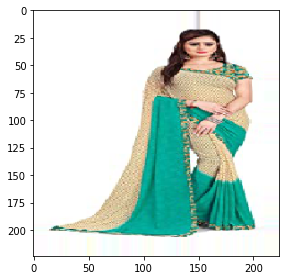

[0. 0. 1.]


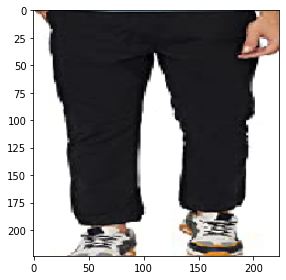

[1. 0. 0.]


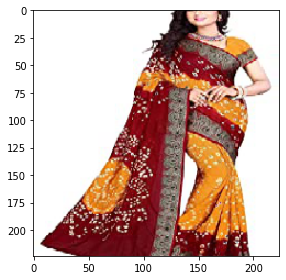

[0. 0. 1.]


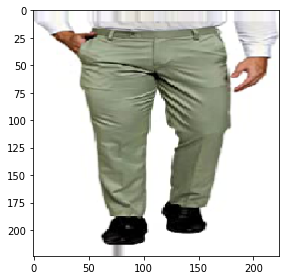

[0. 0. 1.]


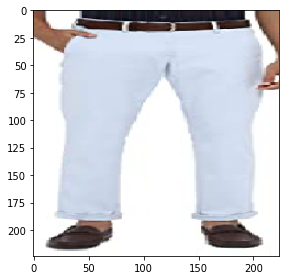

[1. 0. 0.]


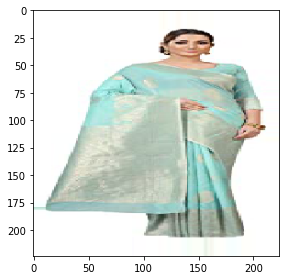

[0. 0. 1.]


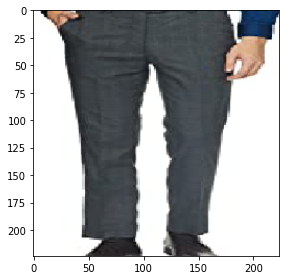

[1. 0. 0.]


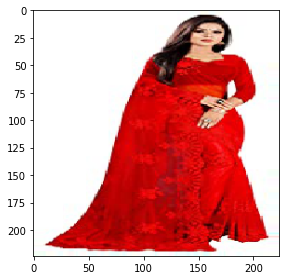

[0. 0. 1.]


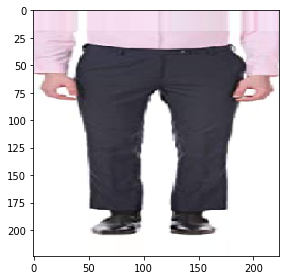

[0. 0. 1.]


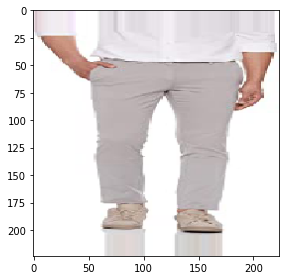

[0. 1. 0.]


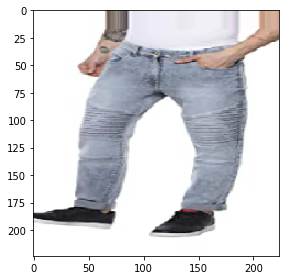

[0. 0. 1.]


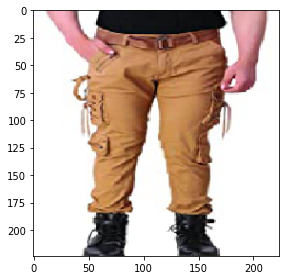

[0. 1. 0.]


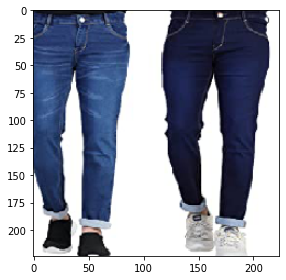

[0. 1. 0.]


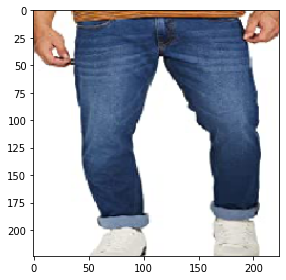

[0. 1. 0.]


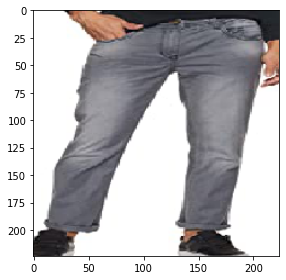

[0. 0. 1.]


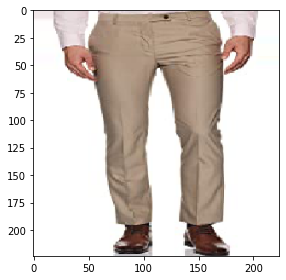

[1. 0. 0.]


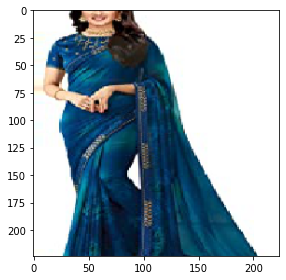

[0. 0. 1.]


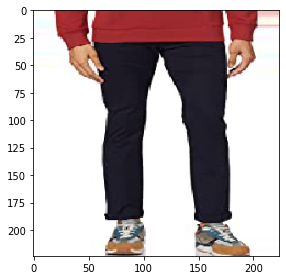

[0. 1. 0.]


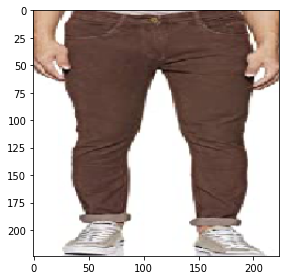

[1. 0. 0.]


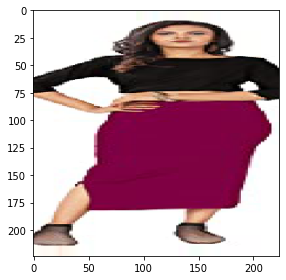

[1. 0. 0.]


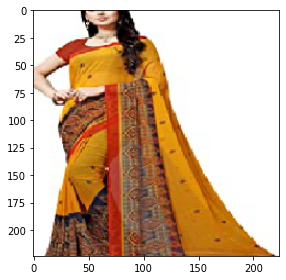

[0. 0. 1.]


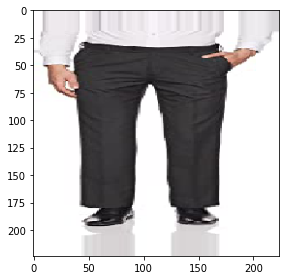

[0. 0. 1.]


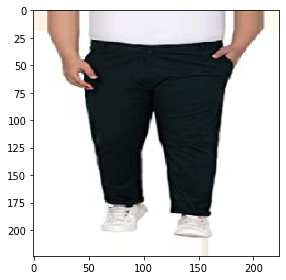

[0. 1. 0.]


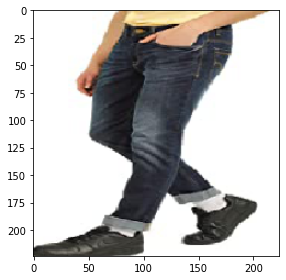

[0. 1. 0.]


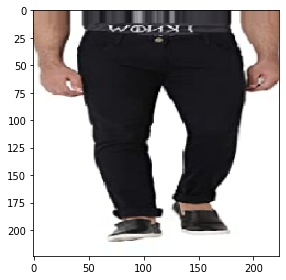

[1. 0. 0.]


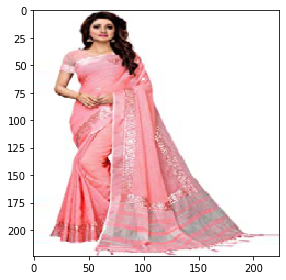

[0. 0. 1.]


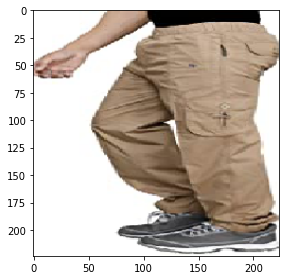

[0. 0. 1.]


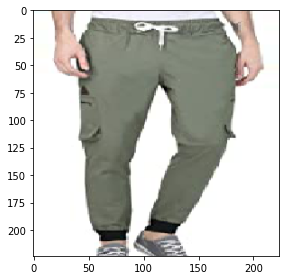

[0. 0. 1.]


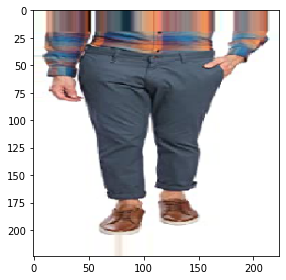

[1. 0. 0.]


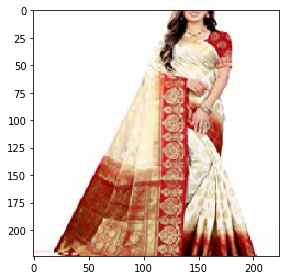

[0. 1. 0.]


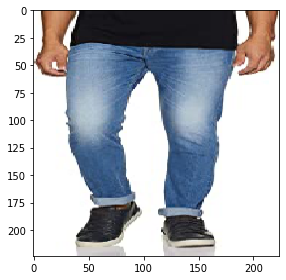

[1. 0. 0.]


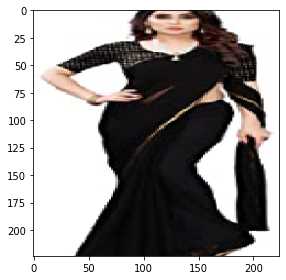

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = training_set .next()
print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [31]:
# fitting the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
81/81 [==============================] - 451s 5s/step - loss: 1.0246 - accuracy: 0.3333 - val_loss: 1.2291 - val_accuracy: 1.0000
Epoch 2/50
81/81 [==============================] - 45s 554ms/step - loss: 0.6413 - accuracy: 0.3333 - val_loss: 1.0619 - val_accuracy: 1.0000
Epoch 3/50
81/81 [==============================] - 45s 552ms/step - loss: 0.6401 - accuracy: 0.3333 - val_loss: 1.1355 - val_accuracy: 1.0000
Epoch 4/50
81/81 [==============================] - 45s 555ms/step - loss: 0.6413 - accuracy: 0.3333 - val_loss: 1.1535 - val_accuracy: 1.0000
Epoch 5/50
81/81 [==============================] - 45s 556ms/step - loss: 0.6455 - accuracy: 0.3333 - val_loss: 0.9897 - val_accuracy: 1.0000
Epoch 6/50
81/81 [==============================] - 45s 550ms/step - loss: 0.6525 - accuracy: 0.3333 - val_loss: 1.1816 - val_accuracy: 1.0000
Epoch 7/50
81/81 [==============================] - 45s 547ms/step - loss: 0.6514 - accuracy: 0.3333 - val_loss: 0.8054 - val_accuracy: 1.0000
E

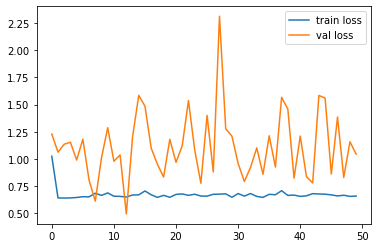

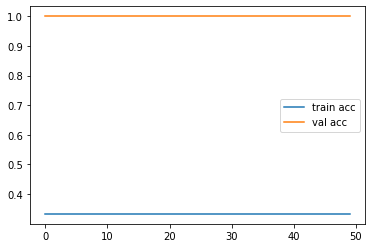

<Figure size 432x288 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
y_pred = model.predict(test_set)
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [34]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# Model saving as h5 file


from tensorflow.keras.models import load_model

model.save('image_classification.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
